## Clustering

In [162]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [163]:
# import dataset
df = pd.read_csv('../UFC_train.csv')
df.head()

,R_fighter,B_fighter,Referee,date,location,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner
0,Joe Riggs,Joe Doerksen,Steve Mazzagatti,2004-08-21,"Las Vegas, Nevada, USA",False,Middleweight,NaN,NaN,NaN,...,0,0,0,Southpaw,182.88,177.80,185.0,26.0,21.0,Red
1,Jorge Masvidal,Al Iaquinta,Keith Peterson,2015-04-04,"Fairfax, Virginia, USA",False,Lightweight,1.156250,0.000000,0.394141,...,0,1,0,Orthodox,180.34,187.96,170.0,27.0,30.0,Blue
2,Dan Stittgen,Stephen Thompson,Josh Rosenthal,2012-02-04,"Las Vegas, Nevada, USA",False,Welterweight,NaN,NaN,NaN,...,0,0,0,Orthodox,185.42,NaN,170.0,28.0,31.0,Blue
3,Josh Koscheck,Johny Hendricks,Kevin Mulhall,2012-05-05,"East Rutherford, New Jersey, USA",False,Welterweight,0.695312,0.000000,0.783359,...,6,3,0,Orthodox,177.80,185.42,170.0,28.0,34.0,Blue
4,John Dodson,Manvel Gamburyan,James Warring,2016-04-16,"Tampa, Florida, USA",False,Bantamweight,0.500000,0.266602,0.381462,...,3,0,1,Orthodox,160.02,167.64,135.0,34.0,31.0,Red


In [164]:
df.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,...,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5406.000000,5035.000000,5408.000000,5249.000000,5354.000000
mean,0.246168,0.178367,0.452056,0.434747,0.294146,0.269072,0.481064,0.409737,0.157034,0.142247,...,0.304806,1.253235,1.298152,0.807209,0.068022,178.979789,183.565069,170.840791,29.272814,29.615241
std,0.378912,0.325767,0.131406,0.132410,0.273653,0.266687,0.725191,0.654882,0.339665,0.325981,...,0.615084,1.672650,1.867989,1.366471,0.270906,8.814587,10.592526,35.841492,4.052329,4.146788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,0.000000,0.000000,0.375000,0.351914,0.031250,0.034785,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,26.000000,27.000000
50%,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.156250,0.125000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,180.340000,182.880000,170.000000,29.000000,29.000000
75%,0.500000,0.250000,0.526562,0.510000,0.500000,0.423203,0.750000,0.523438,0.125000,0.125000,...,0.000000,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,3.000000,3.000000,...,5.000000,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000,345.000000,51.000000,47.000000


### Clustering 1
Pada clustering ini pertanyaannya adalah cluster apa saja yang terbentuk dari tendensi para petarung memenangkan pertandingan mereka (TKO, Submission, Decision_majority, Decision_split, Decision_Unanimous, TKO_Doctor_stoppage)

In [165]:
features_to_keep = ["B_fighter", "R_fighter", "B_win_by_Decision_Majority", "R_win_by_Decision_Majority", "B_win_by_Decision_Split", "R_win_by_Decision_Split", "B_win_by_Decision_Unanimous", "R_win_by_Decision_Unanimous", "B_win_by_KO/TKO", "R_win_by_KO/TKO", "B_win_by_Submission", "R_win_by_Submission"]

df_cluster = df[features_to_keep]

df_cluster.head()

,B_fighter,R_fighter,B_win_by_Decision_Majority,R_win_by_Decision_Majority,B_win_by_Decision_Split,R_win_by_Decision_Split,B_win_by_Decision_Unanimous,R_win_by_Decision_Unanimous,B_win_by_KO/TKO,R_win_by_KO/TKO,B_win_by_Submission,R_win_by_Submission
0,Joe Doerksen,Joe Riggs,0,0,0,0,0,0,0,0,0,0
1,Al Iaquinta,Jorge Masvidal,0,0,0,0,3,4,3,0,0,1
2,Stephen Thompson,Dan Stittgen,0,0,0,0,0,0,0,0,0,0
3,Johny Hendricks,Josh Koscheck,1,0,1,1,1,5,4,6,0,3
4,Manvel Gamburyan,John Dodson,0,0,0,0,3,2,0,3,3,0


In [166]:
df = df.drop_duplicates(subset=['B_fighter', 'R_fighter'])

# B_fighter df
df_B_fighter = df[['B_fighter', 'B_win_by_Decision_Majority', 'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission']]

# Rename all columns to remove the 'B_' prefix
df_B_fighter.columns = df_B_fighter.columns.str.replace('B_', '')

# R_fighter df
df_R_fighter = df[['R_fighter', 'R_win_by_Decision_Majority', 'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission']]

# Rename all columns to remove the 'R_' prefix
df_R_fighter.columns = df_R_fighter.columns.str.replace('R_', '')

# Combine the two DFs
df_fighter = pd.concat([df_B_fighter, df_R_fighter])

df_fighter.head()


,fighter,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission
0,Joe Doerksen,0,0,0,0,0
1,Al Iaquinta,0,0,3,3,0
2,Stephen Thompson,0,0,0,0,0
3,Johny Hendricks,1,1,1,4,0
4,Manvel Gamburyan,0,0,3,0,3


In [167]:
df_fighter.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Majority,10680.0,0.021442,0.146146,0.0,0.0,0.0,0.0,2.0
win_by_Decision_Split,10680.0,0.260581,0.571984,0.0,0.0,0.0,0.0,5.0
win_by_Decision_Unanimous,10680.0,1.035206,1.534470,0.0,0.0,0.0,1.0,10.0
win_by_KO/TKO,10680.0,1.081367,1.728514,0.0,0.0,0.0,1.0,11.0
win_by_Submission,10680.0,0.686049,1.273834,0.0,0.0,0.0,1.0,14.0


Karena jarang Fighter yang memenangkan pertandingannya dengan Decision Majority dan Decision Split, drop kolom tersebut. Karena jika ada fighter yang memenangkan pertandingannya dengan cara tersebut, fighter tersebut termasuk outlier dan ini dapat merusak clustering.

In [168]:
# Drop columns
features_to_drop = ['win_by_Decision_Majority', 'win_by_Decision_Split']

df_fighter = df_fighter.drop(features_to_drop, axis=1)

df_fighter.columns

Index(['fighter', 'win_by_Decision_Unanimous', 'win_by_KO/TKO',
       'win_by_Submission'],
      dtype='object')

In [169]:
df_fighter.describe().T

,count,mean,std,min,25%,50%,75%,max
win_by_Decision_Unanimous,10680.0,1.035206,1.534470,0.0,0.0,0.0,1.0,10.0
win_by_KO/TKO,10680.0,1.081367,1.728514,0.0,0.0,0.0,1.0,11.0
win_by_Submission,10680.0,0.686049,1.273834,0.0,0.0,0.0,1.0,14.0


In [170]:
df_fighter.drop_duplicates(subset=['fighter'], inplace=True)

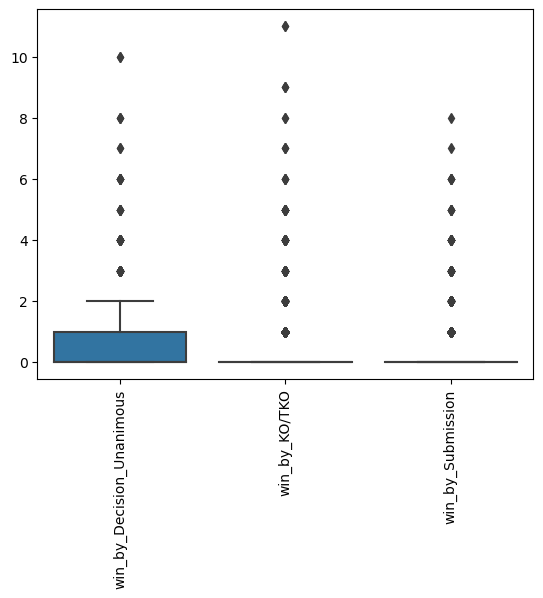

In [171]:
# Check outliers
sns.boxplot(data=df_fighter)
plt.xticks(rotation=90)
plt.show()


In [172]:
df_fighter.shape

(2100, 4)

In [173]:
# Converting the features to categorical features
df_fighter['win_by_Decision_Unanimous'] = pd.cut(df_fighter['win_by_Decision_Unanimous'], bins=3, labels=['low', 'medium', 'high'])
df_fighter['win_by_KO/TKO'] = pd.cut(df_fighter['win_by_KO/TKO'], bins=3, labels=['low', 'medium', 'high'])
df_fighter['win_by_Submission'] = pd.cut(df_fighter['win_by_Submission'], bins=3, labels=['low', 'medium', 'high'])

df_fighter.head()

,fighter,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission
0,Joe Doerksen,low,low,low
1,Al Iaquinta,low,low,low
2,Stephen Thompson,low,low,low
3,Johny Hendricks,low,medium,low
4,Manvel Gamburyan,low,low,medium


In [174]:
df_fighter.isnull().sum()*100/df_fighter.shape[0]


fighter                      0.0
win_by_Decision_Unanimous    0.0
win_by_KO/TKO                0.0
win_by_Submission            0.0
dtype: float64

In [175]:
df_fighter_copy = df_fighter.copy()

df_fighter_copy.head()

,fighter,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission
0,Joe Doerksen,low,low,low
1,Al Iaquinta,low,low,low
2,Stephen Thompson,low,low,low
3,Johny Hendricks,low,medium,low
4,Manvel Gamburyan,low,low,medium


In [176]:
# Label encoder
le = LabelEncoder()
df_fighter_copy = df_fighter_copy.apply(le.fit_transform)

df_fighter_copy.head()


,fighter,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission
0,947,1,1,1
1,27,1,1,1
2,1859,1,1,1
3,1003,1,2,1
4,1282,1,1,2


In [177]:
from kmodes.kmodes import KModes

cost = []
for num_clusters in list(range(1,20)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df_fighter_copy)
    cost.append(kmode.cost_)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2290.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2221.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2169.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2136.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2130.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2125.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2122.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100,

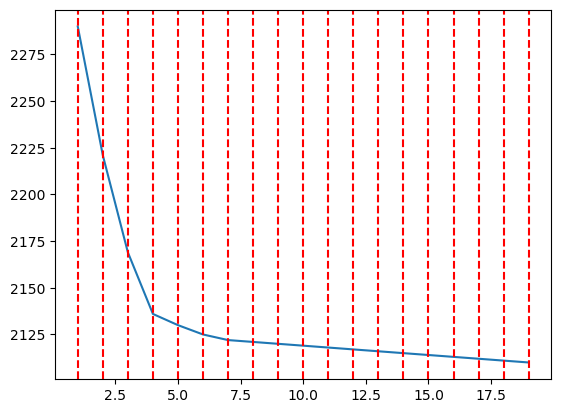

In [178]:
y = np.array([i for i in range(1,20,1)])
plt.plot(y, cost)

# Add vertical lines
for x in y:
    plt.axvline(x, color='r', linestyle='--')

plt.show()


Choose K =4

In [179]:
km_cao = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_fighter_copy)

fitClusters_cao

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2136.0


array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [180]:
df_fighter_copy.head()

,fighter,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission
0,947,1,1,1
1,27,1,1,1
2,1859,1,1,1
3,1003,1,2,1
4,1282,1,1,2


In [187]:
df_fighter_copy = df_fighter_copy.reset_index()

cluster_df = pd.DataFrame(fitClusters_cao)
cluster_df.columns = ['cluster_predicted']
combined_df = pd.concat([df_fighter_copy, cluster_df], axis = 1).reset_index()
combined_df = combined_df.drop(['index', 'level_0'], axis = 1)

combined_df.head()

,fighter,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster_predicted
0,947,1,1,1,0
1,27,1,1,1,0
2,1859,1,1,1,0
3,1003,1,2,1,2
4,1282,1,1,2,1


In [188]:
df_fighter['cluster'] = fitClusters_cao

df_fighter.head()

,fighter,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
0,Joe Doerksen,low,low,low,0
1,Al Iaquinta,low,low,low,0
2,Stephen Thompson,low,low,low,0
3,Johny Hendricks,low,medium,low,2
4,Manvel Gamburyan,low,low,medium,1


In [190]:
df_fighter[df_fighter['cluster'] == 0]

,fighter,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
0,Joe Doerksen,low,low,low,0
1,Al Iaquinta,low,low,low,0
2,Stephen Thompson,low,low,low,0
5,Jorge Lopez,low,low,low,0
6,Katsunori Kikuno,low,low,low,0
...,...,...,...,...,...
5195,Albert Cheng,low,low,low,0
5223,Roman Kopylov,low,low,low,0
5274,Darrell Montague,low,low,low,0
5291,Brad Gumm,low,low,low,0


In [191]:
df_fighter[df_fighter['cluster'] == 1]

,fighter,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
4,Manvel Gamburyan,low,low,medium,1
19,Cynthia Calvillo,low,low,medium,1
58,Daniel Pineda,low,low,medium,1
62,Dustin Poirier,medium,medium,medium,1
107,TJ Waldburger,low,low,medium,1
...,...,...,...,...,...
3090,Oleg Taktarov,low,low,medium,1
3310,Mitch Gagnon,low,low,medium,1
3788,Warlley Alves,low,low,medium,1
4882,Mark Bocek,low,low,medium,1


In [192]:
df_fighter[df_fighter['cluster'] == 2]

,fighter,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
3,Johny Hendricks,low,medium,low,2
36,Matt Hamill,low,medium,low,2
39,Niko Price,low,medium,low,2
43,Ovince Saint Preux,low,medium,low,2
44,Jake Ellenberger,low,medium,low,2
50,Mike Perry,low,medium,low,2
59,Francis Ngannou,low,medium,low,2
134,Matt Mitrione,low,medium,low,2
147,Randy Couture,low,medium,low,2
154,Chris Leben,low,medium,low,2


In [193]:
df_fighter[df_fighter['cluster'] == 3]

,fighter,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,cluster
304,Corey Anderson,medium,low,low,3
344,Chris Camozzi,medium,low,low,3
405,Demian Maia,medium,low,high,3
411,Donald Cerrone,medium,high,high,3
460,Vinc Pichel,medium,low,low,3
479,Ross Pearson,medium,low,low,3
490,Angela Hill,medium,low,low,3
568,Jorge Masvidal,medium,low,low,3
571,Ryan Bader,medium,low,low,3
606,Yushin Okami,medium,low,low,3


In [189]:
# Plot 3D 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_fighter['win_by_Decision_Unanimous'], df_fighter['win_by_KO/TKO'], df_fighter['win_by_Submission'], c=df_fighter['cluster'], s=60)

ValueError: could not convert string to float: 'low'

TypeError: can't multiply sequence by non-int of type 'float'

<Figure size 2000x1000 with 1 Axes>